# 花哨的索引

利用简答的索引值可以修改数组，如arr[0], arr[:5], arr[arr > 0]

## 1. 探索花哨的索引

In [4]:
import numpy as np 
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


方法1

In [5]:
[x[3], x[7], x[2]]

[71, 86, 14]

方法2

In [7]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

**结果的形状与索引的一致**

In [6]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

**多维度的索引**

In [10]:
x = np.arange(12).reshape((3, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [13]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
x[row, col] # 即得到x[0, 2], x[1, 1], x[2, 3]

array([ 2,  5, 11])

索引遵守广播的规则,将一个行向量和列向量组合在一起  
得到一个广播后二维的结果  
index_array = [[0],   &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;              [[[0, 2], [0, 1], [0, 3]],  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;    [1],  [2, 1, 3]  ->  [[1, 2], [1, 1], [1, 3]],  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;               [2]]         &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;           [[2, 2], [2, 1], [2, 3]]]  

In [17]:
x[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

## 2.组合索引

In [18]:
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [19]:
x[2, [2, 0, 1]]

array([10,  8,  9])

In [25]:
x[1:, [2, 0, 1]]
# 行取1，2  列取2，0，1

array([[ 6,  4,  5],
       [10,  8,  9]])

In [24]:
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [21]:
mask = np.array([1, 0, 1, 0], dtype=bool)
x[row[:, np.newaxis], mask]
# 行取0，1，2  列取0，2

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## 3.示例：选择随机点  

从一个矩阵中选取行的子集

In [26]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
x = rand.multivariate_normal(mean, cov, 100) # 二维正态分布
x.shape

(100, 2)

In [28]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn; seaborn.set()

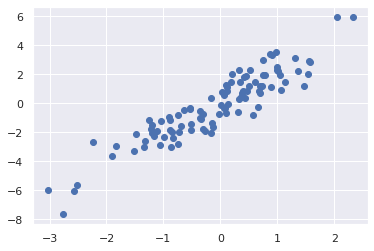

In [30]:
plt.scatter(x[:, 0], x[:, 1]);

In [31]:
indices = np.random.choice(x.shape[0], 20, replace=False)

In [32]:
indices

array([79, 52, 91, 35, 81, 59,  5, 73, 80, 38, 31,  8, 34, 99, 84, 29, 98,
       43, 17, 69])

In [33]:
selection = x[indices] #fancy index
selection.shape

(20, 2)

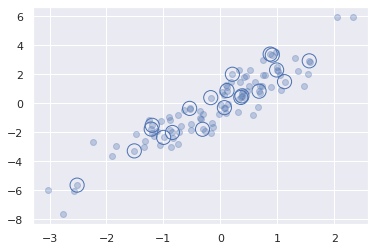

In [34]:
plt.scatter(x[:, 0], x[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
           facecolor='none', edgecolor='b', s=200)

## 4.以花哨的索引修改值

In [35]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [36]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


操作中重复的索引会导致意外

In [37]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [38]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

**真正的累加方法** 

In [39]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]
